In [1]:
!git clone https://github.com/ArkZ10/APACO.git

Cloning into 'APACO'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 12 (delta 1), reused 5 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (12/12), 15.37 MiB | 9.04 MiB/s, done.
Resolving deltas: 100% (1/1), done.


##Analyze

In [2]:
import json
import pandas as pd

with open('/content/APACO/multiqc_data_665.json') as f:
    data = json.load(f)


In [3]:
with open('/content/APACO/multiqc_data_379.json') as f:
    data_379 = json.load(f)

general_stats_379 = data_379['report_general_stats_data']

In [4]:
general_stats = data['report_general_stats_data']

flight_samples = {}
hgc_samples = {}
vgc_samples = {}


for entry in general_stats:
  for sample_name, stats in entry.items():
      if "FLT" in sample_name:
          flight_samples[sample_name] = stats
      elif "GC" in sample_name:
          hgc_samples[sample_name] = stats
      elif "VIV" in sample_name:
          vgc_samples[sample_name] = stats

print(f"Flight samples: {len(flight_samples)}")
print(f"HGC samples: {len(hgc_samples)}")
print(f"VGC samples: {len(vgc_samples)}")


Flight samples: 20
HGC samples: 20
VGC samples: 20


In [5]:
import pandas as pd

summary = []

for entry in general_stats:
    for sample, stats in entry.items():
        sample_summary = {
            'Sample': sample,
            'GC Content (%)': stats.get('percent_gc', 'N/A'),
            'Average Sequence Length': stats.get('avg_sequence_length', 'N/A'),
            'Total Sequences': stats.get('total_sequences', 'N/A'),
            'Duplication Rate (%)': stats.get('percent_duplicates', 'N/A'),
            'Failed Sequences (%)': stats.get('percent_fails', 'N/A')
        }
        summary.append(sample_summary)

summary_665_df = pd.DataFrame(summary)
summary_665_df.to_csv('/content/multiqc_summary_665.csv', index=False)

In [6]:
summary = []

for entry in general_stats_379:
    for sample, stats in entry.items():
        sample_summary = {
            'Sample': sample,
            'GC Content (%)': stats.get('percent_gc', 'N/A'),
            'Average Sequence Length': stats.get('avg_sequence_length', 'N/A'),
            'Total Sequences': stats.get('total_sequences', 'N/A'),
            'Duplication Rate (%)': stats.get('percent_duplicates', 'N/A'),
            'Failed Sequences (%)': stats.get('percent_fails', 'N/A')
        }
        summary.append(sample_summary)

summary_379_df = pd.DataFrame(summary)
summary_379_df.to_csv('/content/multiqc_summary_379.csv', index=False)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

def extract_metric(sample_dict, metric_key):
    return [stats[metric_key] for stats in sample_dict.values()]

flight_gc = extract_metric(flight_samples, 'percent_gc')
hgc_gc = extract_metric(hgc_samples, 'percent_gc')
vgc_gc = extract_metric(vgc_samples, 'percent_gc')

flight_dup = extract_metric(flight_samples, 'percent_duplicates')
hgc_dup = extract_metric(hgc_samples, 'percent_duplicates')
vgc_dup = extract_metric(vgc_samples, 'percent_duplicates')

flight_seq = extract_metric(flight_samples, 'total_sequences')
hgc_seq = extract_metric(hgc_samples, 'total_sequences')
vgc_seq = extract_metric(vgc_samples, 'total_sequences')


In [8]:
import plotly.graph_objs as go
import numpy as np

n_metrics = len(flight_gc)

x_labels = np.array([1, 2])
group_labels = ['Flight', 'HGC']


flight_trace = go.Scatter3d(
    x=np.full(n_metrics, x_labels[0]),
    y=flight_gc,
    z=flight_dup,
    mode='lines+markers',
    line=dict(color='red', width=4),
    marker=dict(size=8, color='red'),
    name='Flight',
    text=flight_seq,
    hoverinfo='x+y+z+text',
)

hgc_trace = go.Scatter3d(
    x=np.full(n_metrics, x_labels[1]),
    y=hgc_gc,
    z=hgc_dup,
    mode='lines+markers',
    line=dict(color='green', width=4),
    marker=dict(size=8, color='green'),
    name='HGC',
    text=hgc_seq,
    hoverinfo='x+y+z+text',
)

layout = go.Layout(
    title='Interactive 3D Line Plot: GC Content vs Duplication Rate (Flight vs HGC)',
    scene=dict(
        xaxis=dict(title='Groups', tickvals=x_labels, ticktext=group_labels),
        yaxis=dict(title='GC Content (%)'),
        zaxis=dict(title='Duplication Rate (%)'),
    ),
    legend=dict(x=0, y=1),
)

fig = go.Figure(data=[flight_trace, hgc_trace], layout=layout)

fig.show()


In [9]:
import json

flight_gc = extract_metric(flight_samples, 'percent_gc')
hgc_gc = extract_metric(hgc_samples, 'percent_gc')
flight_dup = extract_metric(flight_samples, 'percent_duplicates')
hgc_dup = extract_metric(hgc_samples, 'percent_duplicates')

data_dict = {
    'flight_gc': flight_gc,
    'hgc_gc': hgc_gc,
    'flight_dup': flight_dup,
    'hgc_dup': hgc_dup
}

with open('data.json', 'w') as f:
    json.dump(data_dict, f)


Hey, it’s Larry the space mouse! This plot shows how space affected my eyes. The red dots (Flight) are more spread out, meaning my RNA became unstable in space, likely from the extra pressure on my eyes due to fluid buildup in my head. This could lead to vision problems, like blurred vision.

The green dots (HGC) show my friends on Earth had stable RNA, so their eyes didn’t face the same stress. In short, space made my eyes struggle, and this plot helps scientists understand why!








In [10]:
from scipy import stats

anova_gc = stats.f_oneway(flight_gc, hgc_gc, vgc_gc)
print(f"ANOVA p-value for GC Content: {anova_gc.pvalue}")

anova_dup = stats.f_oneway(flight_dup, hgc_dup, vgc_dup)
print(f"ANOVA p-value for Duplication Rate: {anova_dup.pvalue}")

anova_seq = stats.f_oneway(flight_seq, hgc_seq, vgc_seq)
print(f"ANOVA p-value for Total Sequences: {anova_seq.pvalue}")


ANOVA p-value for GC Content: 0.0015907681694089858
ANOVA p-value for Duplication Rate: 0.004663090648329565
ANOVA p-value for Total Sequences: 0.1584096820972282


In [11]:
report_plot_data = data['report_plot_data']
datasets = report_plot_data['fastqc_per_base_sequence_quality_plot']['datasets']

In [12]:
gc_samples_raw = []
viv_samples_raw = []
spaceflight_samples_raw = []

for sample in datasets[0]:
    sample_name = sample['name']

    if "GC" in sample_name:
        gc_samples_raw.append(sample)
    elif "VIV" in sample_name:
        viv_samples_raw.append(sample)
    elif "FLT" in sample_name:
        spaceflight_samples_raw.append(sample)

print(f"GC Samples: {len(gc_samples_raw)}")
print(f"Vivarium Samples: {len(viv_samples_raw)}")
print(f"Spaceflight Samples: {len(spaceflight_samples_raw)}")


GC Samples: 20
Vivarium Samples: 20
Spaceflight Samples: 20


In [13]:
import plotly.graph_objs as go

def plot_group_quality_scores_3d(group_samples, group_name):
    fig = go.Figure()

    for idx, sample_data in enumerate(group_samples):
        base_positions = [item[0] for item in sample_data['data']]
        quality_scores = [item[1] for item in sample_data['data']]
        z_values = [idx] * len(base_positions)

        fig.add_trace(go.Scatter3d(x=base_positions, y=quality_scores, z=z_values,
                                   mode='lines', name=sample_data['name']))

    fig.update_layout(
        title=f'3D Per Base Quality Scores for {group_name}',
        scene=dict(
            xaxis_title='Base Position',
            yaxis_title='Quality Score',
            zaxis_title='Sample Index'
        ),
        margin=dict(l=0, r=0, b=0, t=50)
    )

    fig.show()

plot_group_quality_scores_3d(gc_samples_raw, 'GC (Ground Control)')



In [14]:
plot_group_quality_scores_3d(spaceflight_samples_raw, 'Spaceflight')

In [15]:
import json


output_data = {
    'gc_samples_raw': gc_samples_raw,
    'viv_samples_raw': viv_samples_raw,
    'spaceflight_samples_raw': spaceflight_samples_raw
}

json_file_path = 'data2.json'

with open(json_file_path, 'w') as json_file:
    json.dump(output_data, json_file, indent=4)
print(f"Data saved to {json_file_path}")


Data saved to data2.json


Hey, it’s Larry the space mouse! On Earth, my eyes were fine, and you can see that in the first plot—everything was steady and consistent. But in space, things changed. The second plot shows more ups and downs, meaning my eyes were under pressure from fluid shifting to my head in microgravity.

This caused stress on my eyes and probably affected my vision, which scientists call SANS. The RNA quality scores dropping show that my eyes struggled more in space compared to when I was back on Earth.

In [16]:
import pandas as pd

data_for_pca = []
group_labels = []

for sample in gc_samples_raw:
    scores = [sample['data'][i][1] for i in range(20)]
    data_for_pca.append(scores)
    group_labels.append('GC')

for sample in viv_samples_raw:
    scores = [sample['data'][i][1] for i in range(20)]
    data_for_pca.append(scores)
    group_labels.append('VIV')

for sample in spaceflight_samples_raw:
    scores = [sample['data'][i][1] for i in range(20)]
    data_for_pca.append(scores)
    group_labels.append('Spaceflight')

df_pca = pd.DataFrame(data_for_pca, columns=[f'Base_{i+1}' for i in range(20)])


In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_pca)


In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
principal_components = pca.fit_transform(scaled_data)

df_pca_result = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

df_pca_result['Group'] = group_labels

print(df_pca_result.head())


        PC1       PC2       PC3 Group
0  4.301319  0.087777 -0.012015    GC
1 -7.268907  0.573113  0.284141    GC
2  4.163357 -0.026426 -0.163044    GC
3 -4.173988 -0.074021  0.065731    GC
4  4.230054  0.064798 -0.029159    GC


In [19]:
import plotly.express as px

fig = px.scatter_3d(df_pca_result, x='PC1', y='PC2', z='PC3', color='Group',
                    title='3D PCA of Quality Scores for GC, VIV, and Spaceflight Groups')

fig.update_layout(scene = dict(
                    xaxis_title=f"PC1 ({pca.explained_variance_ratio_[0] * 100:.2f}%)",
                    yaxis_title=f"PC2 ({pca.explained_variance_ratio_[1] * 100:.2f}%)",
                    zaxis_title=f"PC3 ({pca.explained_variance_ratio_[2] * 100:.2f}%)"),
                  margin=dict(l=0, r=0, b=0, t=50))

fig.show()


In [31]:
import json
import pandas as pd

df_pca_result = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])
df_pca_result['Group'] = group_labels

data_dict = df_pca_result.to_dict(orient='records')

with open('data3.json', 'w') as f:
    json.dump(data_dict, f, indent=4)
print("PCA result saved to pca_result.json")

PCA result saved to pca_result.json


Hey, it’s Larry the space mouse again! My trip to space didn’t just mess with my muscles, it really affected my eyes too. In space, without gravity, fluid shifts toward the head, putting more pressure on the eyes and blood vessels, which made it harder for my body to keep them healthy.

In the PCA chart, you can see the green dots (spaceflight group) are all spread out, unlike the blue dots (ground control). This shows that in space, my body, especially my eyes, had a much more varied and stressful reaction to microgravity compared to my friends on Earth. Some of us had more changes in our eyes than others, causing big differences in our RNA.

This spread means spaceflight caused a lot of pressure and strain on my eyes, making it tough to adjust, which could lead to long-term vision problems like the fluid buildup astronauts face. Scientists can use this info to figure out how to protect eyes during space missions, keeping our vision clear even in zero gravity!

## ML

In [20]:
df = pd.concat([summary_665_df, summary_379_df], ignore_index=True)
df.head()

,Sample,GC Content (%),Average Sequence Length,Total Sequences,Duplication Rate (%),Failed Sequences (%)
0,RR23_R-EDL_FLT_F9_R2_raw,45.0,151.0,98082584.0,75.899569,27.272727
1,RR23_R-EDL_FLT_F2_R2_raw,44.0,151.0,94177785.0,76.702949,27.272727
2,RR23_R-EDL_GC_G6_R1_raw,45.0,151.0,90677361.0,76.868881,18.181818
3,RR23_R-EDL_VIV_V5_R2_raw,45.0,151.0,109488221.0,76.717109,27.272727
4,RR23_R-EDL_GC_G9_R2_raw,45.0,151.0,106644836.0,75.975180,27.272727


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Sample                   342 non-null    object 
 1   GC Content (%)           342 non-null    float64
 2   Average Sequence Length  342 non-null    float64
 3   Total Sequences          342 non-null    float64
 4   Duplication Rate (%)     342 non-null    float64
 5   Failed Sequences (%)     342 non-null    float64
dtypes: float64(5), object(1)
memory usage: 16.2+ KB


In [22]:
mean_duplication_rate = df['Failed Sequences (%)'].mean()

print(f"The mean duplication rate is: {mean_duplication_rate:.2f}%")


The mean duplication rate is: 29.45%


In [23]:
df['quality_label'] = df.apply(lambda row: 0 if (row['Duplication Rate (%)'] > 77.70 or row['Failed Sequences (%)'] > 28) else 1, axis=1)


In [24]:
df['quality_label'].value_counts()

,count
quality_label,
0,197
1,145


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = df[['GC Content (%)', 'Total Sequences', 'Duplication Rate (%)', 'Failed Sequences (%)']]
y = df['quality_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 82.61%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [26]:
train_accuracy = model.score(X_train, y_train)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')

test_accuracy = model.score(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


Training Accuracy: 82.42%
Test Accuracy: 82.61%


# GLDS-25


In [27]:
import pandas as pd

Data = pd.read_csv('/content/APACO/GLDS-25_array_differential_expression_GLmicroarray.csv')
Data.head()

<ipython-input-27-243170b14b2a>:3: DtypeWarning:

Columns (0,1,2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.



,ENSEMBL,SYMBOL,GENENAME,REFSEQ,ENTREZID,STRING_id,GOSLIM_IDS,ProbesetID,count_ENSEMBL_mappings,Mmus_C57-6CR_LVR_GC_Rep1,...,All.mean,All.stdev,F,F.p.value,Group.Mean_(Ground Control),Group.Mean_(Space Flight),Group.Mean_(Vivarium Control),Group.Stdev_(Ground Control),Group.Stdev_(Space Flight),Group.Stdev_(Vivarium Control)
0,ENSMUSG00000000001,Gnai3,guanine nucleotide binding protein (G protein)...,NM_010306|NP_034436,14679,10090.ENSMUSP00000000001,GO:0051339|GO:0007188|GO:0010646|GO:0051716|GO...,10501265,1,9.044609,...,9.027384,0.334058,26.006448,0.000006,8.873190,8.771071,9.412191,0.180490,0.170161,0.147592
1,ENSMUSG00000000003,Pbsn,probasin,NM_017471|NP_059499,54192,10090.ENSMUSP00000000003,GO:0005488|GO:0005615|GO:0110165|GO:0005576,10605475,1,2.493718,...,2.674698,0.161275,3.662214,0.046885,2.655983,2.793019,2.571973,0.166289,0.154147,0.086805
2,ENSMUSG00000000028,Cdc45,cell division cycle 45,NM_001161623|NM_001358206|NM_009862|NP_0011550...,12544,10090.ENSMUSP00000000028,GO:0044085|GO:0000280|GO:0010467|GO:1903507|GO...,10438378,1,6.052137,...,6.067952,0.167666,1.280320,0.302697,6.165224,6.044689,6.010156,0.104559,0.127714,0.225347
3,ENSMUSG00000000037,Scml2,Scm polycomb group protein like 2,NM_001290651|NM_001290652|NM_133194|NP_0012775...,107815,10090.ENSMUSP00000076593,NaN,10602977,1,4.765293,...,4.699657,0.165071,1.315593,0.293538,4.780269,4.711478,4.620659,0.109448,0.211255,0.137217
4,ENSMUSG00000000049,Apoh,apolipoprotein H,NM_013475|NP_038503|XM_006532042|XP_006532105,11818,10090.ENSMUSP00000000049,NaN,10382189,1,13.071012,...,13.062466,0.075848,5.431353,0.014601,13.138540,13.054662,13.006876,0.038085,0.069081,0.053930


In [33]:
import plotly.graph_objs as go
import numpy as np

df = Data
df = df.dropna()

df['-log10(p_value)'] = -np.log10(df['P.value_(Ground Control)v(Space Flight)'])

df['Expression'] = df[['Mmus_C57-6CR_LVR_GC_Rep1',
                       'Mmus_C57-6CR_LVR_GC_Rep2',
                       'Mmus_C57-6CR_LVR_GC_Rep3',
                       'Mmus_C57-6CR_LVR_GC_Rep4',
                       'Mmus_C57-6CR_LVR_GC_Rep5',
                       'Mmus_C57-6CR_LVR_FLT_Rep1',
                       'Mmus_C57-6CR_LVR_FLT_Rep2',
                       'Mmus_C57-6CR_LVR_FLT_Rep3',
                       'Mmus_C57-6CR_LVR_FLT_Rep4',
                       'Mmus_C57-6CR_LVR_FLT_Rep5',
                       'Mmus_C57-6CR_LVR_FLT_Rep6',
                       'Mmus_C57-6CR_LVR_VIV_Rep1',
                       'Mmus_C57-6CR_LVR_VIV_Rep2',
                       'Mmus_C57-6CR_LVR_VIV_Rep3',
                       'Mmus_C57-6CR_LVR_VIV_Rep4',
                       'Mmus_C57-6CR_LVR_VIV_Rep5',
                       'Mmus_C57-6CR_LVR_VIV_Rep6']].mean(axis=1)


fig = go.Figure()

fig.add_trace(go.Scatter3d(
    x=df['Log2fc_(Ground Control)v(Space Flight)'],
    y=df['-log10(p_value)'],
    z=df['Expression'],
    mode='markers',
    marker=dict(
        size=5,
        color=df['Expression'],
        colorscale='Viridis',
        opacity=0.8,
        colorbar=dict(title="Expression Level")
    ),
    name="All Genes"
))

significant = df[(df['P.value_(Ground Control)v(Space Flight)'] < 0.05) & (np.abs(df['Log2fc_(Ground Control)v(Space Flight)']) > 1)]

fig.add_trace(go.Scatter3d(
    x=significant['Log2fc_(Ground Control)v(Space Flight)'],
    y=significant['-log10(p_value)'],
    z=significant['Expression'],
    mode='markers',
    marker=dict(
        size=6,
        color='red',
        opacity=0.9
    ),
    name="Significant Genes"
))

fig.update_layout(
    title="Interactive 3D Volcano Plot of Differentially Expressed Genes",
    scene=dict(
        xaxis_title="Log2 Fold Change",
        yaxis_title="-Log10(p-value)",
        zaxis_title="Expression Level"
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor="rgba(255, 255, 255, 0)",
        bordercolor="rgba(255, 255, 255, 0)"
    )
)

fig.show()


<ipython-input-33-772e43ad18c5>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-33-772e43ad18c5>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




Hey, it’s Larry the space mouse! This plot shows how space affected my liver. The red dots are the liver genes that changed the most while I was floating in space.

**Liver Genes in Space:**
Some genes went way up (on the right) to help my liver handle stress from space. These genes probably helped deal with oxidative stress, DNA repair, or breaking down damaged proteins.
Other liver genes slowed down (on the left), meaning they weren’t needed as much in space, like metabolic processes that might be less active in microgravity.



**What It Means for My Liver:**
In space, my liver had to work harder to adapt to the new environment, and this plot shows which genes stepped up to keep me healthy. Scientists can now use this info to help astronauts’ livers cope with space stress on future missions!

In [34]:

df[['Log2fc_(Ground Control)v(Space Flight)', '-log10(p_value)', 'Expression']].to_json('data4.json', orient='split')


In [35]:
import plotly.graph_objects as go
import numpy as np

expression_data = df.iloc[:, 9:26]
expression_data.index = df['GENENAME']

top_genes = expression_data.var(axis=1).sort_values(ascending=False).head(20).index
expression_data = expression_data.loc[top_genes]

data_matrix = expression_data.values

fig = go.Figure(data=[go.Surface(z=data_matrix, x=expression_data.columns, y=expression_data.index)])

fig.update_layout(title='3D Surface Plot of Gene Expression',
                  scene=dict(
                      xaxis_title='Conditions',
                      yaxis_title='Genes',
                      zaxis_title='Expression Level'),
                  autosize=False,
                  width=800, height=800)

fig.show()


In [36]:
expression_data.to_json('expression_data.json', orient='split')


Hey, it’s Larry the space mouse again, and this time we’re talking about how space impacted my liver!

**My Liver in Space (Flight Group)**
When I was in space, my liver was working overtime. I know this because the gene GADD45B, which helps deal with DNA damage and stress, was working harder. Space radiation and microgravity made my liver cells face more oxidative stress, and my liver had to step up to protect itself.

**Protein Cleanup Crew:**
In space, my liver also had to break down more damaged proteins. The gene for Ubiquitin-Conjugating Enzyme shows that my liver was under pressure to clear out all the proteins that weren’t working well because of the space environment. It’s like my liver was cleaning up more mess than usual.

**Still Getting the Job Done:**
Even though my liver was under stress, it kept up with important jobs like making cholesterol (thanks to the Squalene Epoxidase gene) and moving things around in cells (the RAB14 gene). So, while space made things tougher, my liver adapted and kept on working.


In short, space was rough on my liver, but it found ways to deal with the extra stress and keep me healthy. This helps scientists understand how our bodies, especially our livers, handle the challenges of space!

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



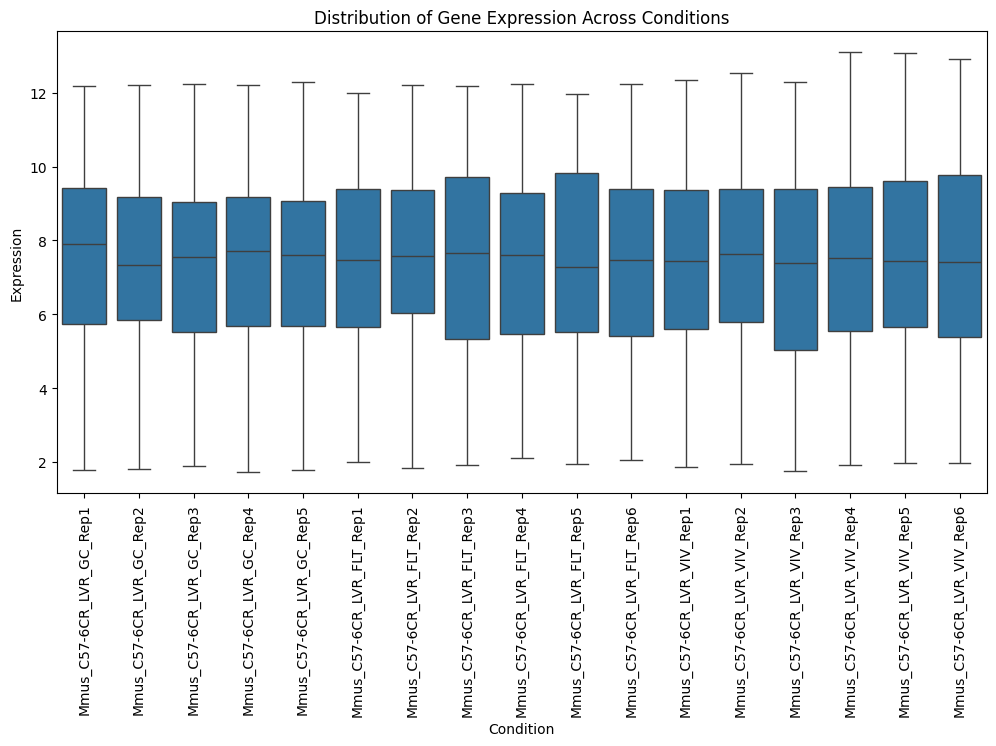

In [30]:
expression_long = expression_data.melt(var_name='Condition', value_name='Expression')

plt.figure(figsize=(12, 6))
sns.boxplot(x='Condition', y='Expression', data=expression_long)
plt.title('Distribution of Gene Expression Across Conditions')
plt.xticks(rotation=90)
plt.show()

Hey, it’s Larry the space mouse again! This boxplot shows how my genes behaved in space compared to my friends back on Earth and in the vivarium. Here’s what it tells us:

#Stable Genes in Space:
The boxes are all pretty similar, which means that my gene expression stayed fairly stable whether I was floating in space (Flight group), chilling on Earth (Ground Control), or in the vivarium. Even though space is stressful, my body didn’t let everything go crazy—my liver and other organs kept things under control.

#No Big Shocks:
Look at how none of the boxes have wild differences. That means my genes didn’t freak out in space, and my body, especially my liver, found a way to keep working despite the new environment.

#What It Means for Me:
Even though space was tough, my liver and genes adapted and kept things running smoothly. Sure, there were specific changes in some genes, but overall, my body handled space pretty well!

In short: space didn’t throw my gene expression off balance, and my liver stayed tough, keeping me healthy up there!